In [1]:
import numpy as np
import pandas as pd

In [4]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing,metrics

# Image Feature Extraction

In [6]:
from sklearn.feature_extraction import image

In [8]:
array = np.arange(4*4*3).reshape((4,4,3))
array

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]],

       [[24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]],

       [[36, 37, 38],
        [39, 40, 41],
        [42, 43, 44],
        [45, 46, 47]]])

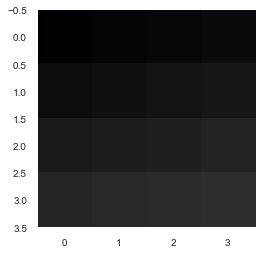

In [9]:
plt.imshow(array)

In [10]:
array[:,:,0]

array([[ 0,  3,  6,  9],
       [12, 15, 18, 21],
       [24, 27, 30, 33],
       [36, 39, 42, 45]])

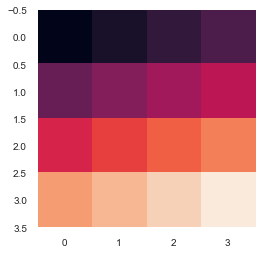

In [11]:
plt.imshow(array[:,:,0])

In [12]:
array.shape

(4, 4, 3)

In [13]:
patches = image.extract_patches_2d(array,
                                  (2,2),
                                  max_patches=2,
                                  random_state=0)

In [14]:
patches

array([[[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[12, 13, 14],
         [15, 16, 17]]],


       [[[15, 16, 17],
         [18, 19, 20]],

        [[27, 28, 29],
         [30, 31, 32]]]])

In [15]:
patches.shape

(2, 2, 2, 3)

In [16]:
patches[:,:,:,0]

array([[[ 0,  3],
        [12, 15]],

       [[15, 18],
        [27, 30]]])

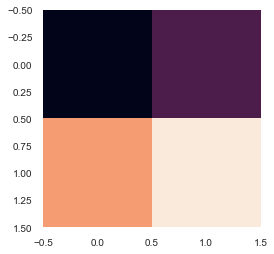

In [17]:
plt.imshow(patches[:,:,:,0][0])

In [18]:
reconstruct = image.reconstruct_from_patches_2d(patches,(4,4,3))
reconstruct.shape

(4, 4, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


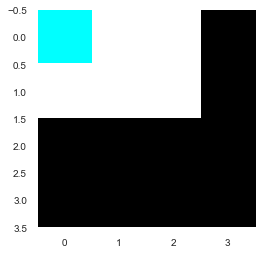

In [19]:
plt.imshow(reconstruct)

In [21]:
p = image.PatchExtractor(patch_size=(2,2)).transform(patches)

In [22]:
p.shape

(2, 2, 2, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


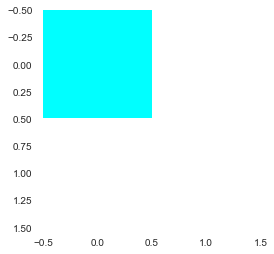

In [24]:
plt.imshow(p[0])

In [26]:
from skimage.io import imread,imshow

In [27]:
path = "https://raw.githubusercontent.com/reddyprasade/Bird-Classifications-Problem/master/Parrot/1.jpg"

In [28]:
path

'https://raw.githubusercontent.com/reddyprasade/Bird-Classifications-Problem/master/Parrot/1.jpg'

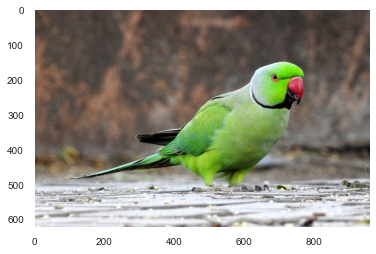

In [53]:
image = imread(path)
plt.imshow(image)

In [54]:
image.shape

(622, 960, 3)

In [32]:
from skimage.filters import prewitt_h,prewitt_v

In [34]:
features = np.reshape(image,(622*960,3))
features.shape

(597120, 3)

In [35]:
features

array([[ 77,  68,  69],
       [ 76,  68,  66],
       [ 78,  66,  66],
       ...,
       [222, 224, 219],
       [222, 224, 219],
       [223, 225, 220]], dtype=uint8)

In [36]:
# Calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(features)

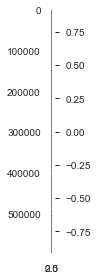

In [37]:
imshow(edges_prewitt_horizontal,cmap='gray')

In [38]:
# calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(features)

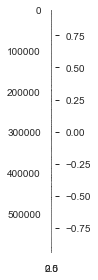

In [39]:
imshow(edges_prewitt_vertical,cmap='gray')

In [40]:
from skimage.data import coins
from skimage.transform import rescale

In [41]:
orig_coins = coins()

In [42]:
orig_coins

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

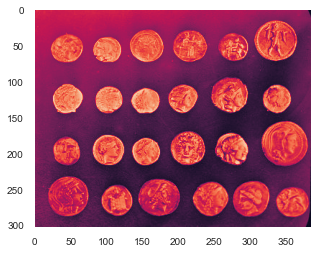

In [44]:
plt.imshow(orig_coins)

In [45]:
from scipy.ndimage.filters import gaussian_filter

smooth_coins = gaussian_filter(orig_coins,sigma=2)
smooth_coins

array([[117, 121, 127, ...,  27,  17,  13],
       [120, 124, 128, ...,  29,  19,  13],
       [125, 127, 130, ...,  32,  21,  16],
       ...,
       [ 79,  78,  75, ...,   9,   7,   6],
       [ 79,  77,  75, ...,   8,   6,   6],
       [ 79,  77,  74, ...,   7,   6,   6]], dtype=uint8)

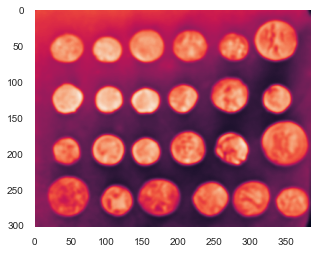

In [46]:
plt.imshow(smooth_coins)

In [47]:
rescaled_coins = rescale(smooth_coins,0.2,mode='reflect')


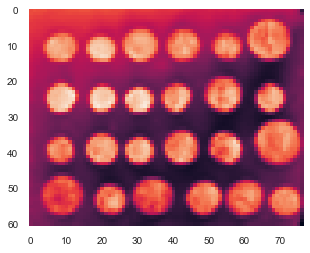

In [48]:
plt.imshow(rescaled_coins)

In [49]:
from sklearn.feature_extraction.image import grid_to_graph
connectivity = grid_to_graph(*rescaled_coins.shape)
connectivity

<4697x4697 sparse matrix of type '<class 'numpy.int32'>'
	with 23209 stored elements in COOrdinate format>

In [50]:
ar = connectivity.toarray()

In [51]:
ar

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 1, 1]])

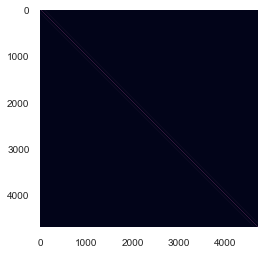

In [52]:
plt.imshow(ar)